<a href="https://colab.research.google.com/github/joaomr7/portfolio-data-science/blob/main/Analisando_os_Dados_do_Airbnb_Sidney_Austr%C3%A1lia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sydney*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Sydney na Austrália, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


Os dados usados neste notebook forma obtidos no site [Inside Airbnb](http://insideairbnb.com/get-the-data/).
Para fazer a análise está sendo usado o arquivo:
  * `listings.csv` - *Summary information and metrics for listings in Sydney (good for visualisations).*

**Observação: o site pode eventualmente atualizar os dados, então as informações aqui podem estar datadas neste momento.**

In [85]:
# instalar pacote necessário
!pip install -U kaleido

In [86]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Image

In [87]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/australia/nsw/sydney/2023-06-06/visualisations/listings.csv',
                 index_col = 'id', parse_dates=['last_review'])

## Análise dos Dados


Começamos entendendo melhor os dados nessa etapa, para sabermos com que tipo de dados estamos lidando. Isso nos permitirá termos uma ideia do que podemos fazer com o conjunto de dados.

**Dicionário das variáveis**

* **id -** identificador único para o imóvel
* **name -** nome da propriedade
* **host_id -** identificador único do proprietário
* **host_name -** nome do proprietário
* **neighbourhood_group -** esta coluna não contém nenhum valor válido
* **neighbourhood -** nome do bairro
* **latitude -** coordenada latitudinal da propriedade
* **longitude -** coordenada longitudinal da propriedade
* **room_type -** tipo de quarto oferecido
* **price -** preço diário na moeda local(no caso o dólar australiano, A\$)
* **minimum_nights -** quantidade mínima de noites para reservar
* **number_of_reviews -** número de avaliações da propriedade
* **last_review -** data do último review
* **reviews_per_month -** quantidade de reviews por mês
* **calculated_host_listings_count -** quantidade de imóveis do mesmo proprietário
* **availability_365 -** número de dias de disponibilidade dentro de 365 dias
* **number_of_reviews_ltm -** número de reviews nos últimos 12 meses
* **license -** licença ou número de registro

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [88]:
# mostrar as 5 primeiras entradas
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
4688422,Rental unit in Manly · ★4.71 · 2 bedrooms · 3 ...,13396297,Anne,NaN,Manly,-33.805600,151.28433,Entire home/apt,300,1,36,2023-01-28,0.35,1,31,13,PID-STRA-26284
39681254,Rental unit in Manly · ★5.0 · 1 bedroom · 1 be...,25316226,Joel,NaN,Manly,-33.805120,151.28907,Entire home/apt,110,90,3,2019-12-12,0.07,1,0,0,NaN
22314790,Rental unit in Manly · 1 bedroom · 2 beds · 1 ...,48897764,Simon,NaN,Manly,-33.796270,151.28476,Entire home/apt,190,90,1,2018-01-06,0.02,1,0,0,NaN
39446599,Guesthouse in Eastwood · 1 bedroom · 1 bed · 1...,152329169,Ebrahim,NaN,Ryde,-33.785970,151.09255,Entire home/apt,70,90,0,NaT,NaN,1,0,0,PID-STRA-26166
43629106,Rental unit in Manly · ★5.0 · 2 bedrooms · 4 b...,348372472,Jo,NaN,Manly,-33.791103,151.28688,Entire home/apt,742,2,27,2023-03-25,0.85,1,282,10,PID-STRA-10013


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Agora vamos identificar quantas entradas e váriaveis temos no conjunto de dados e identificar o tipo de cada variável.

In [89]:
# identificar o volume de dados do DataFrame
print('Quantidade de entradas: \t{}'.format(df.shape[0]))
print('Quantidade de variáveis:\t{}\n'.format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Quantidade de entradas: 	23451
Quantidade de variáveis:	17



name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Antes de prosseguir verificamos se há valores faltantes nos dados, dessa forma verificamos a integridade dos dados, vemos se não há valores importantes faltando.

Percebemos o seguinte:
  * **`neighbourhood_group`** não possui nenhum valor válido
  * **`license`** possui por volta de 52% dos valores ausentes
  * **`reviews_per_month`** possui por volta de 25% dos valores ausentes
  * **`host_name`** não chega a 1% de valores ausentes

In [90]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.526630
reviews_per_month                 0.251460
last_review                       0.251460
host_name                         0.000085
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
name                              0.000000
minimum_nights                    0.000000
host_id                           0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Agora irei plotar os histogramas das variávies para identificar suas distribuições, dessa forma conseguimos ter uma suspeita de existência de valores `outliers`. É importante notar que nem todas as distribuições fazem sentido, como `host_id`, `latitude` e `longitude` por exemplo.


**Dicionário:**

  * **Outlier:** valor que se diferencia demais dos demais valores.

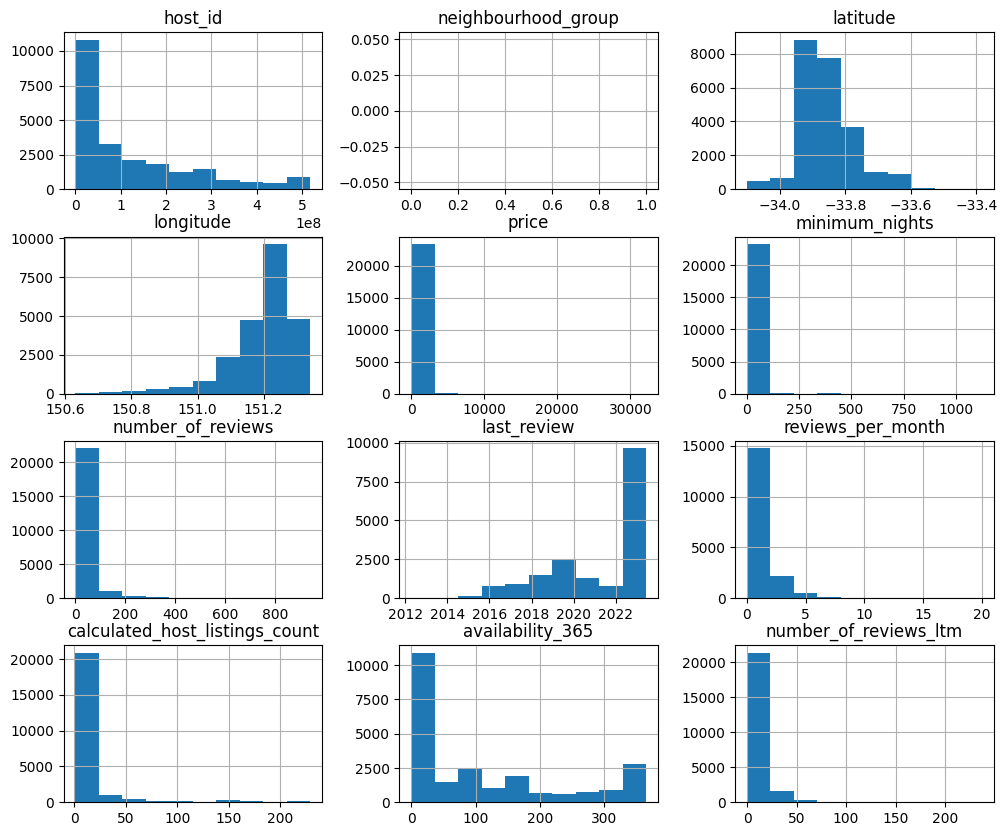

In [91]:
# plotar o histograma das variáveis numéricas
df.hist(figsize=(12, 10));

#### Procurando por `outliers`
Olhando para as distribuições acima conseguimos supeitar que existem alguns valores outliers nas variáveis `price` e `minimum_nights`. Portanto fazemos uma análise mais detalhada desses dados antes de tratarmos os outliers, olhando para a descrição de seus valores e seus box plots.

In [92]:
# Mostrar uma descrição das variáveis 'price' e 'minimum_nights'
display(df[['price', 'minimum_nights']].describe())

,price,minimum_nights
count,23451.000000,23451.000000
mean,289.477549,48.506759
std,556.278930,53.000527
min,16.000000,1.000000
25%,99.000000,2.000000
50%,170.000000,30.000000
75%,299.000000,90.000000
max,32133.000000,1125.000000


##### Boxplot para `price`

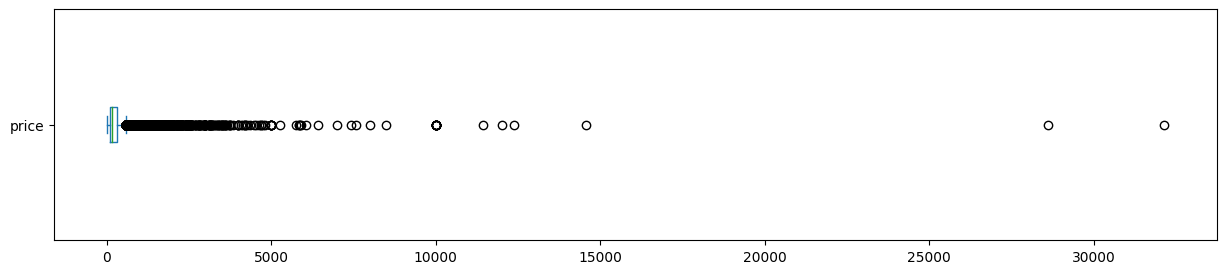

valores acima de A$ 2000.00:
230 entradas
0.9808%


In [93]:
# plotar boxplot para 'price'
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# verificar valores acima de A$ 2000.00, para cortar outliers
print('valores acima de A$ 2000.00:')
print('{} entradas'.format((df.price > 2000).sum()))
print('{:.4f}%'.format((df.price > 2000).sum() / df.shape[0] * 100))

##### Boxplot para `minimum_nights`

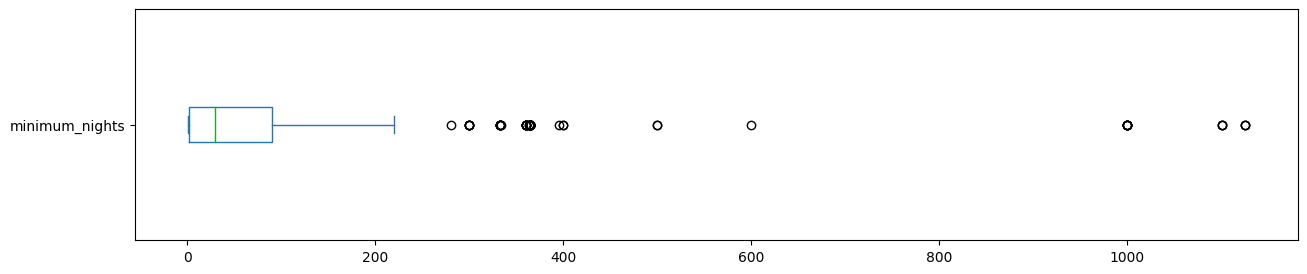

valores acima de 90 dias:
214 entradas
0.9125%


In [94]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# verificar valores acima de 90 dias, para cortar outliers
print('valores acima de 90 dias:')
print('{} entradas'.format((df.minimum_nights > 90).sum()))
print('{:.4f}%'.format((df.minimum_nights > 90).sum() / df.shape[0] * 100))

##### Limpando os dados

E como já era de suspeitar, as váriaveis `price` e `minimum_nights` possuem valores `outliers`, que podem afetar o resto de nossa análise. Então, antes de prosseguir, vamos realizar uma limpeza nos dados e plotar novamentes os histogramas.

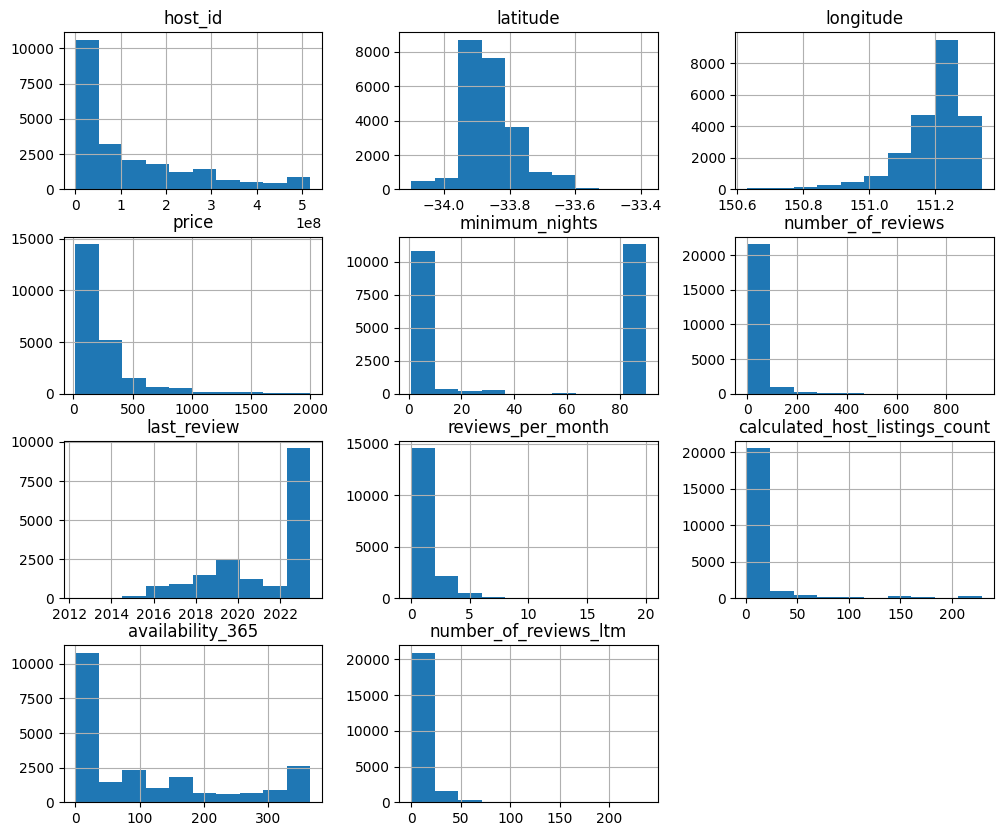

In [95]:
# criar uma cópia dos dados originais e remover os 'outliers'
df_clean = df.copy()
df_clean.drop(set(list(df[df.price > 2000].index) + list(df[df.minimum_nights > 90].index)), axis=0, inplace=True)

# remover a coluna neighbourhood_group, pois não possui valores válidos
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar os histogramas
df_clean.hist(figsize=(12, 10));

### **Q4. Qual a média dos preços de aluguel?**

A média de preços dos aluguéis é de A\$ 254,70, porém, note que ainda existe um `outlier` de A\$ 2.000,00 nos preços de aluguéis(não como antes, que era de A\$ 32.133,00). Por isso, é provável que um valor mais representatível da média de preço de aluguéis seja a mediana, que é de A\$ 170,00, ou um valor entre A\$ 170,00 e A\$ 254,70.

In [96]:
# ver uma descrição da coluna `price`
df_clean.price.describe()

count    23012.000000
mean       254.695941
std        275.245588
min         16.000000
25%         99.000000
50%        170.000000
75%        292.250000
max       2000.000000
Name: price, dtype: float64

### **Q5. Qual a correlação existente entre as variáveis**

Nesta etapa queremos encontrar alguma correlação entre as variáveis que possa nos trazer algum `insight` sobre nosso conjunto de dados.
Porém as correlações mais fortes que encontramos são entre as variáveis `number_of_reviews`, `reviews_per_month` e `number_of_reviews_ltm`, que faz muito sentido, mas não nos traz nenhum `insight`.


**Dicionário:**
  * **Insight:** obter uma compreensão de algo.

In [97]:
# criar uma matriz de correlação
corr = df_clean.corr(numeric_only=True)

# mostrar a matriz de correlação
display(corr)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
host_id,1.000000,0.028373,-0.249811,-0.038506,-0.257513,-0.054591,0.257756,0.093484,0.187734,0.116842
latitude,0.028373,1.000000,0.103147,0.249941,-0.133656,0.004671,0.010814,0.023087,0.125681,0.005290
longitude,-0.249811,0.103147,1.000000,0.238433,0.060966,-0.011864,-0.106113,0.026933,-0.129791,-0.055053
price,-0.038506,0.249941,0.238433,1.000000,-0.243639,-0.059109,-0.029855,0.115496,0.177667,-0.043984
minimum_nights,-0.257513,-0.133656,0.060966,-0.243639,1.000000,-0.284365,-0.525612,-0.222527,-0.394072,-0.471636
number_of_reviews,-0.054591,0.004671,-0.011864,-0.059109,-0.284365,1.000000,0.557678,-0.029568,0.143984,0.704123
reviews_per_month,0.257756,0.010814,-0.106113,-0.029855,-0.525612,0.557678,1.000000,0.043666,0.268204,0.777444
calculated_host_listings_count,0.093484,0.023087,0.026933,0.115496,-0.222527,-0.029568,0.043666,1.000000,0.182010,0.034669
availability_365,0.187734,0.125681,-0.129791,0.177667,-0.394072,0.143984,0.268204,0.182010,1.000000,0.226590
number_of_reviews_ltm,0.116842,0.005290,-0.055053,-0.043984,-0.471636,0.704123,0.777444,0.034669,0.226590,1.000000


<Axes: >

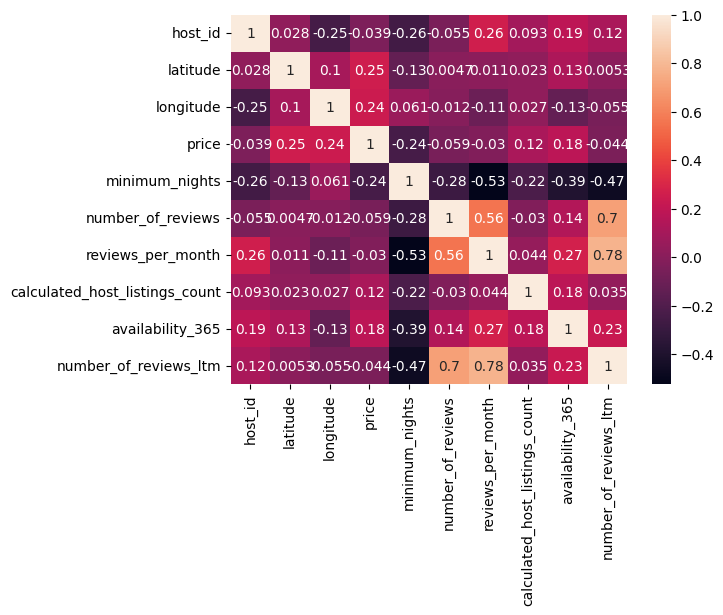

In [98]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, annot=True)

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

Agora queremos saber qual o tipo de imóvel mais alugado em Sydney no Airbnb. Os tipos disponíveis são `Entire home/apt`, `Private room`, `Shared room` e `Hotel room`.

Apartir das quantidades de cada tipo, conseguimos extrair as seguintes informações:
  * **Entire home/apt -** corresponde a 70.01% dos tipos de imóveis.
  * **Private room -** corresponde a 28.39% dos tipos de imóveis.
  * **Shared room -** corresponde a 1.16% dos tipos de imóveis.
  * **Hotel room -** corresponde a 0.42% dos tipos de imóveis.

Os tipos de imóveis em maior quantidade são `Entire home/apt` seguido de `Private room`.

In [99]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    16420
Private room        6659
Shared room          273
Hotel room            99
Name: room_type, dtype: int64

In [100]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.700183
Private room       0.283954
Shared room        0.011641
Hotel room         0.004222
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**



Nessa etapa buscamos identificar a localidade mais cara de Sydney baseado nos dados disponibilizados pelo conjunto de dados.

In [101]:
# ver a descrição dos 10 maiores preços por bairros, ordenados pela média
neighbourhood_desc = df_clean.groupby(by=['neighbourhood']).price.describe().sort_values(by=['mean'], ascending=False)[:10]
display(neighbourhood_desc)

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Pittwater,1024.0,659.402344,508.264384,26.0,250.00,487.5,1000.00,2000.0
Mosman,312.0,440.711538,423.364582,36.0,156.75,273.0,587.00,2000.0
Manly,1122.0,374.506239,313.156780,20.0,164.25,276.5,492.00,2000.0
Warringah,1226.0,359.288744,339.377788,25.0,130.00,236.0,462.00,2000.0
Sutherland Shire,486.0,323.590535,304.401605,34.0,130.00,200.0,401.50,2000.0
Woollahra,842.0,308.885986,319.386717,25.0,117.25,200.0,356.50,2000.0
Waverley,2915.0,277.375986,276.763537,22.0,110.00,198.0,315.50,2000.0
Leichhardt,558.0,249.548387,231.268550,32.0,119.25,181.0,300.00,1995.0
North Sydney,870.0,247.205747,213.711226,19.0,120.25,189.0,298.75,2000.0


Vizinhanças mais caras


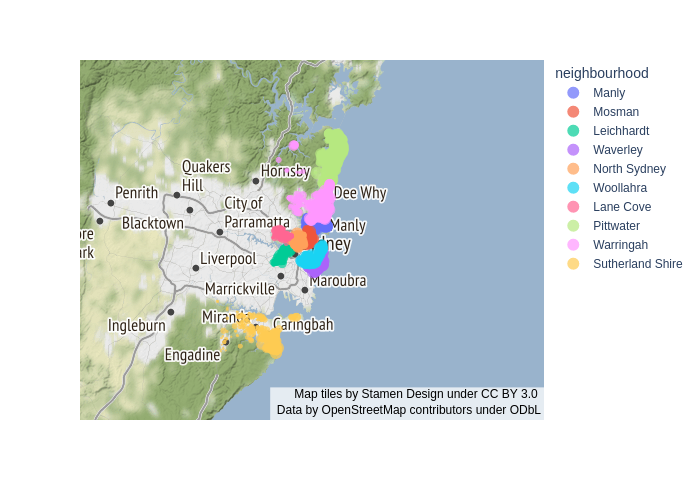

In [102]:
# pegar coordenadas das 10 localidades mais caras
coordinates = df_clean.loc[:, ['neighbourhood', 'price', 'latitude', 'longitude']].copy()
coordinates = coordinates[coordinates.neighbourhood.isin(neighbourhood_desc.index)]

# plotar os imóveis pela latitude-longitude das 10 localidades mais caras
map = px.scatter_mapbox(coordinates,
                        lat='latitude',
                        lon='longitude',
                        hover_name='neighbourhood',
                        hover_data=['price'],
                        color='neighbourhood',
                        size='price',
                        size_max=10,
                        zoom=8,
                        mapbox_style="stamen-terrain")

# pegar bytes da imagem do mapa
image_bytes = map.to_image(format='png')

# mostar mapa
print('Vizinhanças mais caras')
Image(image_bytes)

De maneira geral, nota-se que as localidades mais caras concentram-se na região central da cidade de Sydney, próximas à costa, como é possível observar no mapa acima.

Além disso, é notável que `Pittwater` é o bairro mais caro, com preços em uma média de A\$ 659,40.

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

É possível notar que há dois estremos entre mínimo de noites para aluguel, em um extremo os alugueis são para um mínimo entre 1 e 10 noites, e no outro, entre 80 e 90 noites.

Descrição da coluna "minimum_nights"



count    23012.000000
mean        46.522553
std         43.107547
min          1.000000
25%          2.000000
50%         28.000000
75%         90.000000
max         90.000000
Name: minimum_nights, dtype: float64

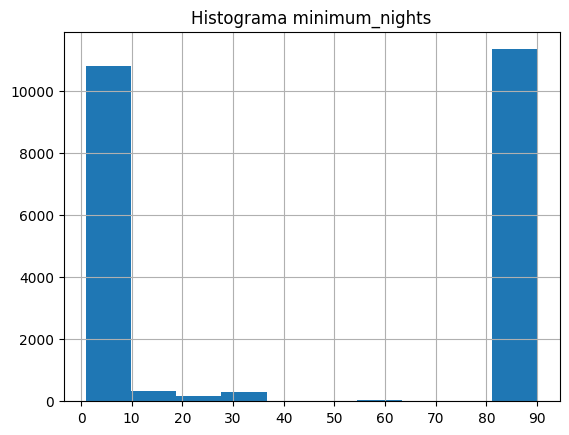

In [103]:
# ver a descrição da coluna `minimum_nights``
print('Descrição da coluna "minimum_nights"\n')
display(df_clean.minimum_nights.describe())

# histograma da coluna minimum_nights
df_clean.minimum_nights.hist(bins=10)

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

plt.title('Histograma minimum_nights')
plt.show()

## Conclusões


Após realizar uma análise nos dados do Airbnb para a cidade de Sydney na Austrália, consegui extarir algumas informações importantes.

* Primerio observei que, se decidisse alugar um imóvel em Sydney, teria que pagar por noite entre A\$ 170,00 e A\$ 254,70, que convertendo para o real(que no momento da minha análise está valendo 0,32 dólares australianos), daria um valor entre R\$ 556,15 e R\$ 833,25.

* Em seguida observei que há uma grande oferta de `Entire home/apt`, que segundo o site da [Airbnb](https://www.airbnb.com/help/article/5), é um lugar inteiro, com quarto, banheiro e cozinha.

* Também percebi que as regiões mais ao cento da cidade tem um valor mais elevado e que o bairro mais caro é Pittwater com uma média de A\$ 659,40(21.7706,77 em reais).

* E por fim observei que, em geral, o mínimo de noites para alugar um imóvel é entre 1 e 10 noites ou entre 80 e 90 noites.

Portanto, Sydney pode ser uma cidade bem cara para os brasileiros desenjando passar uma férias por lá, pois dependendo do lugar em que você decidir se hospedar, pode ter que desenbolçar entre A\$ 170,00 a A\$ 254,70 por noite ou uma média entre A\$ 244,20 e A\$ 659,40 em regiões mais caras.